<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork837-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Feature Engineering**


Estimated time needed: **45** minutes


A critical part of the successful Machine Learning project is coming up with a good set of features to train on. This process is called feature engineering, and it involves three steps: feature transformation (transforming the original features), feature selection (selecting the most useful features to train on), and feature extraction (combining existing features to produce more useful ones). In this notebook we will explore different tools in Feature Engineering.


## Objectives


After completing this lab you will be able to:


*   Understand the types of Feature Engineering
    *   Feature Transformation
        *   Dealing with Categorical Variables
            *   One Hot Encoding
            *   Label Encoding
        *   Date Time Transformations
    *   Feature Selection
    *   Feature Extraction using Principal Component Analysis


***


## **Setup**


For this lab, we will be using the following libraries:

*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01) for managing the data.
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01) for mathematical operations.
*   [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01) for visualizing the data.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01) for visualizing the data.
*   [`plotly.express`](https://plotly.com/python/plotly-express/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01) for visualizing the data.
*   [`sklearn`](https://scikit-learn.org/stable/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01) for machine learning and machine-learning-pipeline related functions.


## **Installing Required Libraries**


The following required modules are pre-installed in the Skills Network Labs environment. However if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda) you will need to install these libraries by removing the `#` sign before `!mamba` in the code cell below.


In [ ]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# !mamba install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1
# Note: If your environment doesn't support "!mamba install", use "!pip install"

In [1]:
!mamba install -qy openpyxl

# This line executes a shell command within the environment (e.g., a Jupyter
# notebook or Google Colab).
# `mamba install` is a command used to install packages using the Mamba package
# manager, which is a fast, C++ re-implementation of the Conda package manager.
# `-q` stands for "quiet," meaning it will suppress most output during the
# installation process.
# `-y` stands for "yes," meaning it will automatically agree to any prompts
# (e.g., "Proceed [y/n]?") during the installation.
# `openpyxl` is the name of the Python package being installed. This package is
# used for reading from and writing to Excel files ('.xlsx' format).

/bin/bash: line 1: mamba: command not found


In [2]:
# Surpress warnings from using older version of sklearn:
def warn(*args, **kwargs):
    pass

# Defines a simple function named `warn` that does nothing. It accepts any
# positional arguments (`*args`) and keyword arguments (`**kwargs`) but
# performs no operation, effectively serving as a "no-op" function.

import warnings

# Imports the built-in Python `warnings` module, which provides functionality
# for issuing warning messages.

warnings.warn = warn

# This line reassigns the `warn` function within the `warnings` module.
# Typically, `warnings.warn` is used to issue warning messages. By assigning
# our custom `warn` function (which does nothing) to `warnings.warn`, we
# are effectively disabling or suppressing all warnings that would normally
# be issued through `warnings.warn`. This is often done to clean up output
# when using libraries that might generate many warnings, such as older
# versions of scikit-learn (`sklearn`), as noted in the initial comment.

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## **Reading and understanding our data**


For this lab, we will be using the airlines_data.xlsx file, hosted on IBM Cloud object. This dataset contains the prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities. This dataset is often used for prediction analysis of the flight prices which are influenced by various factors, such as name of the airline, date of journey, route, departure and arrival times, the source and the destination of the trip, duration and other parameters.

In this notebook, we will use the airlines dataset to perform feature engineering on some of its independent variables.


Let's start by reading the data into *pandas* data frame and looking at the first 5 rows using the `head()` method.


In [4]:
data = pd.read_excel('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0232EN-SkillsNetwork/asset/airlines_data.xlsx')
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


By using the `info` function, we will take a look at the types of data that our dataset contains.


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


As we see from the output above, we mostly have object data types, except for the 'price' column, which is an integer.


The `describe()` function provides the statistical information about the numerical variables. In our case, it is the 'price' variable.


In [6]:
data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


Next, we will check for any null values.


In [8]:
data.isnull().sum()

# `.isnull()` is a DataFrame method that returns a boolean DataFrame of the same
# shape as `data`, where `True` indicates a missing value (NaN) and `False`
# indicates a non-missing value.
# `.sum()` is then applied to the boolean DataFrame. When `sum()` is applied
# to a boolean Series or DataFrame, `True` is treated as 1 and `False` as 0.
# Therefore, `sum()` calculates the total count of `True` values (i.e., missing
# values) for each column.
# The entire expression `data.isnull().sum()` thus returns a pandas Series where
# the index is the column names of the DataFrame `data`, and the values are
# the total number of missing (null) values in each respective column.

,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,1
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,1
Additional_Info,0


Now that we have found some null points, we need to either remove them from our dataset or fill them with something else. In this case, we will use `fillna()` and `method='ffill'`, which fills the last observed non-null value forward until another non-null value is encountered.


In [10]:
data = data.fillna(method='ffill')

# This line of code is used for handling missing values (NaN, or Not a Number)
# within a pandas DataFrame or Series named `data`.
# `fillna()` is a pandas method that replaces missing values.
# `method='ffill'` specifies the "forward fill" or "pad" method. This means
# that any missing value will be filled with the last valid observation
# observed before it in the DataFrame or Series.
# For example, if you have a column [1, NaN, 3, NaN, NaN, 6], after ffill,
# it would become [1, 1, 3, 3, 3, 6].
# This operation modifies the `data` object in place or returns a new object
# with filled values, depending on the original assignment. Here, the result
# is assigned back to `data`, so the original `data` object is updated.

## **Feature Transformation**


Feature Transformation means transforming our features to the functions of the original features. For example, feature encoding, scaling, and discretization (the process of transforming continuous variables into discrete form, by creating bins or intervals) are the most common forms of data transformation.


### **Dealing with Categorical Variables**


Categorical variables represent qualitative data with no apparent inherent mathematical meaning. Therefore, for any machine learning analysis, all the categorical data must be transformed into the numerical data types. First, we'll start with 'Airlines' column, as it contains categorical values. We will use `unique()` method to obtain all the categories in this column.


In [11]:
data['Airline'].unique().tolist()

# Accesses the 'Airline' column from the DataFrame named `data`.
# `.unique()` is then called on this column, which returns an array of all
# the unique (non-repeated) values present in the 'Airline' column.
# `.tolist()` converts this NumPy array of unique values into a standard
# Python list.
# The entire expression therefore extracts all unique airline names from the
# 'Airline' column and presents them as a Python list.

['IndiGo',
 'Air India',
 'Jet Airways',
 'SpiceJet',
 'Multiple carriers',
 'GoAir',
 'Vistara',
 'Air Asia',
 'Vistara Premium economy',
 'Jet Airways Business',
 'Multiple carriers Premium economy',
 'Trujet']

From the above list, we notice that some of the airline names are being repeated. For example, 'Jet Airways' and 'Jet Airways Business'. This means that some of the airlines are subdivided into separate parts. We will combine these 'two-parts' airlines to make our categorical features more consistent with the rest of the variables.

Here, we will use the *numpy* `where()` function to locate and combine the two categories.


In [ ]:
data['Airline'] = np.where(data['Airline']=='Vistara Premium economy', 'Vistara', data['Airline'])

# This line uses the `np.where` function from NumPy to conditionally update the
# 'Airline' column in the DataFrame `data`.
# `np.where(condition, x, y)` works as follows:
# - If `condition` is True, it yields `x`.
# - If `condition` is False, it yields `y`.
# Here, the condition checks if the value in the 'Airline' column is exactly
# 'Vistara Premium economy'.
# If it is, the value in 'Airline' is changed to 'Vistara'.
# If it's not, the value in 'Airline' remains unchanged (i.e., it keeps its
# original value, `data['Airline']`).
# This effectively groups 'Vistara Premium economy' entries under 'Vistara'.

data['Airline'] = np.where(data['Airline']=='Jet Airways Business', 'Jet Airways', data['Airline'])

# Similar to the line above, this line also uses `np.where` to clean up the
# 'Airline' column.
# The condition here checks if the 'Airline' value is 'Jet Airways Business'.
# If true, it replaces 'Jet Airways Business' with 'Jet Airways'.
# If false, the original 'Airline' value is retained.
# This operation consolidates 'Jet Airways Business' entries into 'Jet Airways'.

## Exercise 1

In this exercise, use `np.where()` function to combine 'Multiple carriers Premium economy' and 'Multiple carriers' categories, like shown in the code above. Print the newly created list using `unique().tolist()` functions.


In [20]:
# Enter your code and run the cell

data['Airline'] = np.where(data['Airline']=='Multiple carriers Premium economy', 'Multiple carriers', data['Airline'])

# This line uses the `np.where` function from NumPy to conditionally modify
# the 'Airline' column in the DataFrame named `data`.
# `np.where` works like a vectorized if-else statement:
# - The first argument (`data['Airline']=='Multiple carriers Premium economy'`)
#   is the condition to check. It evaluates to `True` for rows where the
#   'Airline' is 'Multiple carriers Premium economy' and `False` otherwise.
# - The second argument (`'Multiple carriers'`) is the value to assign if the
#   condition is `True`. So, if an airline is 'Multiple carriers Premium economy',
#   it will be changed to 'Multiple carriers'.
# - The third argument (`data['Airline']`) is the value to assign if the
#   condition is `False`. This means if the airline is anything other than
#   'Multiple carriers Premium economy', its value remains unchanged.
# The result of this operation is then assigned back to the 'Airline' column,
# effectively standardizing this specific airline name.

data['Airline'].unique().tolist()

# This line first selects the 'Airline' column from the `data` DataFrame.
# `.unique()` is then called on this Series to get an array of all the unique
# airline names present in the column after the modification.
# Finally, `.tolist()` converts this NumPy array of unique values into a
# standard Python list. This is often done to easily view or work with the
# distinct categories in the 'Airline' column.

['IndiGo',
 'Air India',
 'Jet Airways',
 'SpiceJet',
 'Multiple carriers',
 'GoAir',
 'Vistara',
 'Air Asia',
 'Vistara Premium economy',
 'Jet Airways Business',
 'Trujet']

<details>
<summary><strong>Solution</strong> (Click Here)</summary>
    &emsp; &emsp; <code>

data\['Airline'] = np.where(data\['Airline']=='Multiple carriers Premium economy', 'Multiple carriers', data\['Airline'])
data\['Airline'].unique().tolist()

</code>
</details>


#### **One Hot Encoding**


Now, to be recognized by a machine learning algorithms, our categorical variables should be converted into numerical ones. One way to do this is through *one hot encoding*. To learn more about this process, please visit this [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01).

We will use, `get_dummies()` method to do this transformation. In the next cell, we will transform 'Airline', 'Source', and 'Destination' into their respective numeric variables. We will put all the transformed data into a 'data1' data frame.


In [15]:
data1 = pd.get_dummies(data=data, columns = ['Airline', 'Source', 'Destination'])

# This line performs one-hot encoding on specified categorical columns
# of the DataFrame `data` and stores the result in a new DataFrame `data1`.
# `pd.get_dummies` is a Pandas function used for this purpose.
# `data=data`: Specifies the input DataFrame on which the operation will be
# performed.
# `columns=['Airline', 'Source', 'Destination']`: This argument is a list of
# column names from the `data` DataFrame that should be converted into dummy
# (binary indicator) variables.
# For each unique value in 'Airline', 'Source', and 'Destination' columns,
# a new column will be created in `data1`. These new columns will contain
# either a 0 or 1, indicating the absence or presence of that particular
# category for each row. This process is crucial for converting categorical
# text data into a numerical format that can be used by machine learning
# algorithms.

In [16]:
data1.head()

,Date_of_Journey,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Airline_Air Asia,Airline_Air India,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,24/03/2019,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,False,False,...,False,False,False,False,False,False,False,False,False,True
1,1/05/2019,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,False,True,...,False,False,True,False,True,False,False,False,False,False
2,9/06/2019,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,False,False,...,False,True,False,False,False,True,False,False,False,False
3,12/05/2019,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,False,False,...,False,False,True,False,True,False,False,False,False,False
4,01/03/2019,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,False,False,...,False,False,False,False,False,False,False,False,False,True


Below, we will compare our original data frame with the transformed one.


In [17]:
data.shape

(10683, 11)

In [18]:
data1.shape

(10683, 30)

As we can see, we went from 11 original features in our dataset to 38. This is because *Pandas* `get_dummies()` approach when applied to a column with different categories (e.g. different airlines) will produce a new column (variable) for each unique categorical value (for each unique airline). It will place a one in the column corresponding to the categorical value present for that observation.


## Exercise 2

In this exercise, use `value_counts()` to determine the values distribution of the 'Total_Stops' parameter.


In [22]:
# Enter your code and run the cell
data["Total_Stops"].value_counts()

# This line of code is used to count the occurrences of each unique value
# within the "Total_Stops" column of the DataFrame named `data`.
# `data["Total_Stops"]`: Selects the column named "Total_Stops" from the
# DataFrame. This column likely contains information about the number of
# stops for a flight.
# `.value_counts()`: This is a Pandas Series method that returns a Series
# containing counts of unique values. The resulting Series will have the
# unique values from "Total_Stops" as its index and their corresponding
# counts as its values. The counts are sorted in descending order by default.
# This operation is useful for understanding the distribution of flight
# stops in your dataset (e.g., how many flights have 0 stops, 1 stop, etc.).

,count
Total_Stops,
1 stop,5625
non-stop,3492
2 stops,1520
3 stops,45
4 stops,1


<details>
<summary><strong>Solution</strong> (Click Here)</summary>
    &emsp; &emsp; <code>

data\["Total_Stops"].value_counts()

</code>
</details>


#### **Label Encoding**


Since 'Total_Stops' is originally a categorical data type, we also need to convert it into numerical one. For this, we can perform a label encoding, where values are manually assigned to the corresponding keys, like "0" to a "non-stop", using the `replace()` function.


In [23]:
data1.replace({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4},inplace=True)

# This line is performing a **replacement operation** on the `data1` DataFrame.
# It's specifically designed to convert categorical textual data representing
# the number of stops into numerical values.
# The first argument is a **dictionary** where:
#   - Keys are the original string values (e.g., "non-stop", "1 stop").
#   - Values are the numerical replacements (e.g., 0, 1).
# `inplace=True`: This argument modifies the DataFrame `data1` directly
# without needing to assign the result back to `data1`. If `inplace` were set
# to `False` (or omitted, as `False` is the default), the `replace` method
# would return a new DataFrame with the replacements, and you would need to
# assign it back (e.g., `data1 = data1.replace(...)`).

data1.head()

,Date_of_Journey,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Airline_Air Asia,Airline_Air India,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,24/03/2019,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897,False,False,...,False,False,False,False,False,False,False,False,False,True
1,1/05/2019,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662,False,True,...,False,False,True,False,True,False,False,False,False,False
2,9/06/2019,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882,False,False,...,False,True,False,False,False,True,False,False,False,False
3,12/05/2019,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218,False,False,...,False,False,True,False,True,False,False,False,False,False
4,01/03/2019,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302,False,False,...,False,False,False,False,False,False,False,False,False,True


### **Date Time Transformations**


#### **Transforming the 'Duration' time column**


Here, we will take a closer look at the 'Duration' variable. Duration is the time taken by a plane to reach its destination. It is the difference between the 'Dep_Time' and 'Arrival_Time'. In our dataset, the 'Duration' is expressed as a string, in hours and minutes. To be recognized by machine learning algorithms, we also need to transform it into numerical type.

The code below will iterate through each record in 'Duration' column and split it into hours and minutes, as two additional separate columns. Also, we want to add the 'Duration_hours' (in minutes) to the 'Duration_minutes' column to obtain a 'Duration_Total_mins' time, in minutes. The total duration time column will be useful feature for any regression type of analysis.


In [24]:
duration = list(data1['Duration'])
# This line extracts the 'Duration' column from the `data1` DataFrame and
# converts it into a Python list. Each element in this list is expected
# to be a string representing the flight duration (e.g., "2h 30m", "5h", "45m").

for i in range(len(duration)) :
    if len(duration[i].split()) != 2:
    # This loop iterates through each duration string in the `duration` list.
    # The `if` condition checks if splitting the duration string by space
    # does not result in exactly two parts (e.g., '2h' or '30m' instead of
    # '2h 30m'). This indicates that either hours or minutes are missing.
        if 'h' in duration[i] :
        # If the string contains 'h' (indicating hours are present but minutes
        # might be missing), it proceeds.
            duration[i] = duration[i].strip() + ' 0m'
            # It appends ' 0m' to the duration string, ensuring it has both
            # hours and minutes (e.g., "5h" becomes "5h 0m"). `.strip()`
            # removes any leading/trailing whitespace.
        elif 'm' in duration[i] :
        # If the string contains 'm' (indicating minutes are present but hours
        # might be missing), it proceeds.
            duration[i] = '0h {}'.format(duration[i].strip())
            # It prepends '0h ' to the duration string, ensuring it has both
            # hours and minutes (e.g., "45m" becomes "0h 45m").

dur_hours = []
# Initializes an empty list to store the extracted hours.
dur_minutes = []
# Initializes an empty list to store the extracted minutes.

for i in range(len(duration)) :
# This loop iterates through the (now standardized) duration strings.
    dur_hours.append(int(duration[i].split()[0][:-1]))
    # For each duration string, it splits the string by space, takes the
    # first part (e.g., '2h'), removes the last character ('h'), and converts
    # the remaining string to an integer, then appends it to `dur_hours`.
    dur_minutes.append(int(duration[i].split()[1][:-1]))
    # It takes the second part (e.g., '30m'), removes the last character ('m'),
    # converts the remaining string to an integer, and appends it to
    # `dur_minutes`.

data1['Duration_hours'] = dur_hours
# Adds a new column named 'Duration_hours' to the `data1` DataFrame and
# populates it with the extracted hour values.
data1['Duration_minutes'] =dur_minutes
# Adds a new column named 'Duration_minutes' to the `data1` DataFrame and
# populates it with the extracted minute values.

data1.loc[:,'Duration_hours'] *= 60
# This line converts the 'Duration_hours' from hours into minutes by
# multiplying each value in the column by 60. `data1.loc[:, 'Duration_hours']`
# ensures that the operation is performed on the entire column.

data1['Duration_Total_mins']= data1['Duration_hours']+data1['Duration_minutes']
# Creates a new column named 'Duration_Total_mins' in `data1`. It calculates
# the total duration in minutes by summing the values from the
# 'Duration_hours' (which are now in minutes) and 'Duration_minutes' columns.

Print 'data1' data frame to see the newly created columns.


In [25]:
data1.head()

,Date_of_Journey,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Airline_Air Asia,Airline_Air India,...,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Duration_hours,Duration_minutes,Duration_Total_mins
0,24/03/2019,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897,False,False,...,False,False,False,False,False,False,True,120,50,170
1,1/05/2019,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662,False,True,...,False,True,False,False,False,False,False,420,25,445
2,9/06/2019,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882,False,False,...,False,False,True,False,False,False,False,1140,0,1140
3,12/05/2019,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218,False,False,...,False,True,False,False,False,False,False,300,25,325
4,01/03/2019,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302,False,False,...,False,False,False,False,False,False,True,240,45,285


As you have noticed, three new columns were created: 'Duration_hours', 'Duration_minutes', and 'Duration_Total_mins' - all numerical values.


#### **Transforming the 'Departure' and 'Arrival' Time Columns**


Now, we will transform the 'Dep_Time' and 'Arrival_Time' columns to the appropriate date and time format. We will use *pandas* `to_datetime()` function for this.

We will split the 'Dep_Time' and 'Arrival_Time' columns into their corresponding hours and minutes columns.


In [26]:
data1["Dep_Hour"]= pd.to_datetime(data1['Dep_Time']).dt.hour
data1["Dep_Min"]= pd.to_datetime(data1['Dep_Time']).dt.minute

## Exercise 3

Now, let's transform the 'Arrival_Time' column.


In [27]:
# Enter your code and run the cell

data1["Arrival_Hour"]= pd.to_datetime(data1['Arrival_Time']).dt.hour

# This line creates a new column named 'Arrival_Hour' in the `data1` DataFrame.
# It converts the 'Arrival_Time' column (which is expected to contain time
# strings) into datetime objects using `pd.to_datetime()`.
# Then, `.dt.hour` is used to extract only the hour component (as an integer)
# from these datetime objects. For example, if 'Arrival_Time' is '17:30',
# 'Arrival_Hour' will be 17.

data1["Arrival_Min"]= pd.to_datetime(data1['Arrival_Time']).dt.minute

# This line creates another new column named 'Arrival_Min' in the `data1`
# DataFrame.
# Similar to the previous line, it converts the 'Arrival_Time' column into
# datetime objects using `pd.to_datetime()`.
# Then, `.dt.minute` is used to extract only the minute component (as an
# integer) from these datetime objects. For example, if 'Arrival_Time' is
# '17:30', 'Arrival_Min' will be 30.

<details>
<summary><strong>Solution</strong> (Click Here)</summary>
    &emsp; &emsp; <code>

data1\["Arrival_Hour"]= pd.to_datetime(data1\['Arrival_Time']).dt.hour
data1\["Arrival_Min"]= pd.to_datetime(data1\['Arrival_Time']).dt.minute

</code>
</details>


#### **Splitting 'Departure/Arrival_Time' into Time Zones**


To further transform our 'Departure/Arrival_Time' column, we can break down the 24 hours format for the departure and arrival time into 4 different time zones: night, morning, afternoon, and evening. This might be an interesting feature engineering technique to see what time of a day has the most arrivals/departures.

One way to do this is transformation is by using *pandas* `cut()` function.


In [28]:
data1['dep_timezone'] = pd.cut(data1.Dep_Hour, [0,6,12,18,24], labels=['Night','Morning','Afternoon','Evening'])
data1['dep_timezone']

,dep_timezone
0,Evening
1,Night
2,Morning
3,Afternoon
4,Afternoon
...,...
10678,Evening
10679,Evening
10680,Morning
10681,Morning


## Exercise 4

Now, let's transform the 'Arrival_Time' column into its corresponding time zones, as shown in the example above.


In [29]:
# Enter your code and run the cell

data1["Arrival_Hour"]= pd.to_datetime(data1['Arrival_Time']).dt.hour

# This line creates a new column named 'Arrival_Hour' in the `data1` DataFrame.
# It converts the 'Arrival_Time' column (which is expected to contain time
# strings) into datetime objects using `pd.to_datetime()`.
# Then, `.dt.hour` is used to extract only the hour component (as an integer)
# from these datetime objects. For example, if 'Arrival_Time' is '17:30',
# 'Arrival_Hour' will be 17. This column is then used for the next step.

data1['arr_timezone'] = pd.cut(data1.Arrival_Hour, [0,6,12,18,24], labels=['Night','Morning','Afternoon','Evening'])

# This line creates a new categorical column named 'arr_timezone' in the
# `data1` DataFrame.
# `pd.cut()` is a Pandas function used to segment and sort data values into bins.
# `data1.Arrival_Hour`: This is the input Series (the 'Arrival_Hour' column)
# whose values will be binned.
# `[0,6,12,18,24]`: These are the bin edges.
#   - 0 to 6 (exclusive of 6): will be 'Night'
#   - 6 to 12 (exclusive of 12): will be 'Morning'
#   - 12 to 18 (exclusive of 18): will be 'Afternoon'
#   - 18 to 24 (inclusive of 24, as the default right=True): will be 'Evening'
# `labels=['Night','Morning','Afternoon','Evening']`: These are the labels
# assigned to each bin.
# This effectively categorizes the arrival hour into different timezones
# of the day. For instance, an arrival at 3 AM would be 'Night', at 10 AM
# 'Morning', at 3 PM 'Afternoon', and at 9 PM 'Evening'.


<details>
<summary><strong>Solution</strong> (Click Here)</summary>
    &emsp; &emsp; <code>

data1\["Arrival_Hour"]= pd.to_datetime(data1\['Arrival_Time']).dt.hour
data1\['arr_timezone'] = pd.cut(data1.Arrival_Hour, \[0,6,12,18,24], labels=\['Night','Morning','Afternoon','Evening'])

</code>
</details>


#### **Transforming the 'Date_of_Journey' Column**


Similar to the departure/arrival time, we will now extract some information from the 'date_of_journey' column, which is also an object type and can not be used for any machine learning algorithm yet.

So, we will extract the month information first and store it under the 'Month' column name.


In [31]:
data1['Month']= pd.to_datetime(data1["Date_of_Journey"], format="%d/%m/%Y").dt.month

# This line creates a new column named 'Month' in the `data1` DataFrame.
# `pd.to_datetime()` converts the 'Date_of_Journey' column, which likely
# contains dates as strings (e.g., "01/03/2023"), into datetime objects.
# The `format="%d/%m/%Y"` argument explicitly tells Pandas the expected
# format of the date strings (day/month/year). This is important for
# correct parsing.
# `.dt.month` is then used to extract only the month component (as an integer
# from 1 to 12) from these datetime objects. For example, if 'Date_of_Journey'
# is '01/03/2023', 'Month' will be 3.

## Exercise 5

Now, let's create 'Day' and 'Year' columns in a similar way.


In [33]:
# Enter your code and run the cell

data1['Day']= pd.to_datetime(data1["Date_of_Journey"], format="%d/%m/%Y").dt.day
# This line creates a new column named 'Day' in the `data1` DataFrame.
# It converts the 'Date_of_Journey' column (expected to be date strings like
# "01/03/2023") into datetime objects using `pd.to_datetime()`.
# The `format="%d/%m/%Y"` explicitly tells Pandas the exact format of the
# input date strings (day/month/year). This is crucial for correct parsing.
# `.dt.day` then extracts only the day of the month (as an integer from 1 to 31)
# from these datetime objects. For instance, if 'Date_of_Journey' is
# '01/03/2023', 'Day' will be 1.

data1['Year']= pd.to_datetime(data1["Date_of_Journey"], format="%d/%m/%Y").dt.year
# This line creates another new column named 'Year' in the `data1` DataFrame.
# Similar to the previous line, it converts the 'Date_of_Journey' column into
# datetime objects using `pd.to_datetime()` with the specified format.
# `.dt.year` then extracts only the year component (as an integer) from these
# datetime objects. For example, if 'Date_of_Journey' is '01/03/2023',
# 'Year' will be 2023.

<details>
<summary><strong>Solution</strong> (Click Here)</summary>
    &emsp; &emsp; <code>

data1\['Day']= pd.to_datetime(data1\["Date_of_Journey"], format="%d/%m/%Y").dt.day
data1\['Year']= pd.to_datetime(data1\["Date_of_Journey"], format="%d/%m/%Y").dt.year

</code>
</details>


Additionally, we can extract the day of the weak name by using `dt.day_name()` function.


In [34]:
data1['day_of_week'] = pd.to_datetime(data1['Date_of_Journey']).dt.day_name()

## **Feature Selection**


Here, we will select only those attributes which best explain the relationship of the independent variables with respect to the target variable, 'price'. There are many methods for feature selection, building the heatmap and calculating the correlation coefficients scores are the most commonly used ones.

First, we will select only the relevant and newly transformed variables (and exclude variables such as 'Route', 'Additional_Info', and all the original categorical variables), and place them into a 'new_data' data frame.


We will print all of our data1 columns.


In [35]:
data1.columns

Index(['Date_of_Journey', 'Route', 'Dep_Time', 'Arrival_Time', 'Duration',
       'Total_Stops', 'Additional_Info', 'Price', 'Airline_Air Asia',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers', 'Airline_SpiceJet', 'Airline_Trujet',
       'Airline_Vistara', 'Airline_Vistara Premium economy', 'Source_Banglore',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Banglore', 'Destination_Cochin', 'Destination_Delhi',
       'Destination_Hyderabad', 'Destination_Kolkata', 'Destination_New Delhi',
       'Duration_hours', 'Duration_minutes', 'Duration_Total_mins', 'Dep_Hour',
       'Dep_Min', 'Arrival_Hour', 'Arrival_Min', 'dep_timezone', 'Month',
       'Day', 'Year', 'day_of_week'],
      dtype='object')

In [37]:
new_data = data1.loc[:,['Total_Stops', 'Airline_Air Asia',
        'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
        'Airline_Jet Airways', 'Airline_Multiple carriers', 'Airline_SpiceJet',
        'Airline_Trujet', 'Airline_Vistara', 'Source_Banglore',
        'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
        'Destination_Banglore', 'Destination_Cochin', 'Destination_Delhi',
        'Destination_Hyderabad', 'Destination_Kolkata', 'Destination_New Delhi',
        'Duration_hours', 'Duration_minutes', 'Duration_Total_mins', 'Dep_Hour',
        'Dep_Min', 'dep_timezone', 'Price']]

# This line creates a new DataFrame called `new_data` by selecting a specific
# subset of columns from the existing `data1` DataFrame.
# `data1.loc[:, ...]` is used for label-based indexing:
# - The first `:` indicates that all rows from `data1` should be selected.
# - The second argument is a list of column names enclosed in square brackets.
#   Only these specified columns will be included in the `new_data` DataFrame.
# This operation is typically performed to select features (independent
# variables) and the target variable ('Price' in this case) that will be used
# for training a machine learning model, discarding columns that are not
# relevant or have been transformed (e.g., original 'Airline', 'Source',
# 'Destination' columns after one-hot encoding).

Now we will construct a `heatmap()`, using the *seaborn* library with a newly formed data frame, 'new_data'.


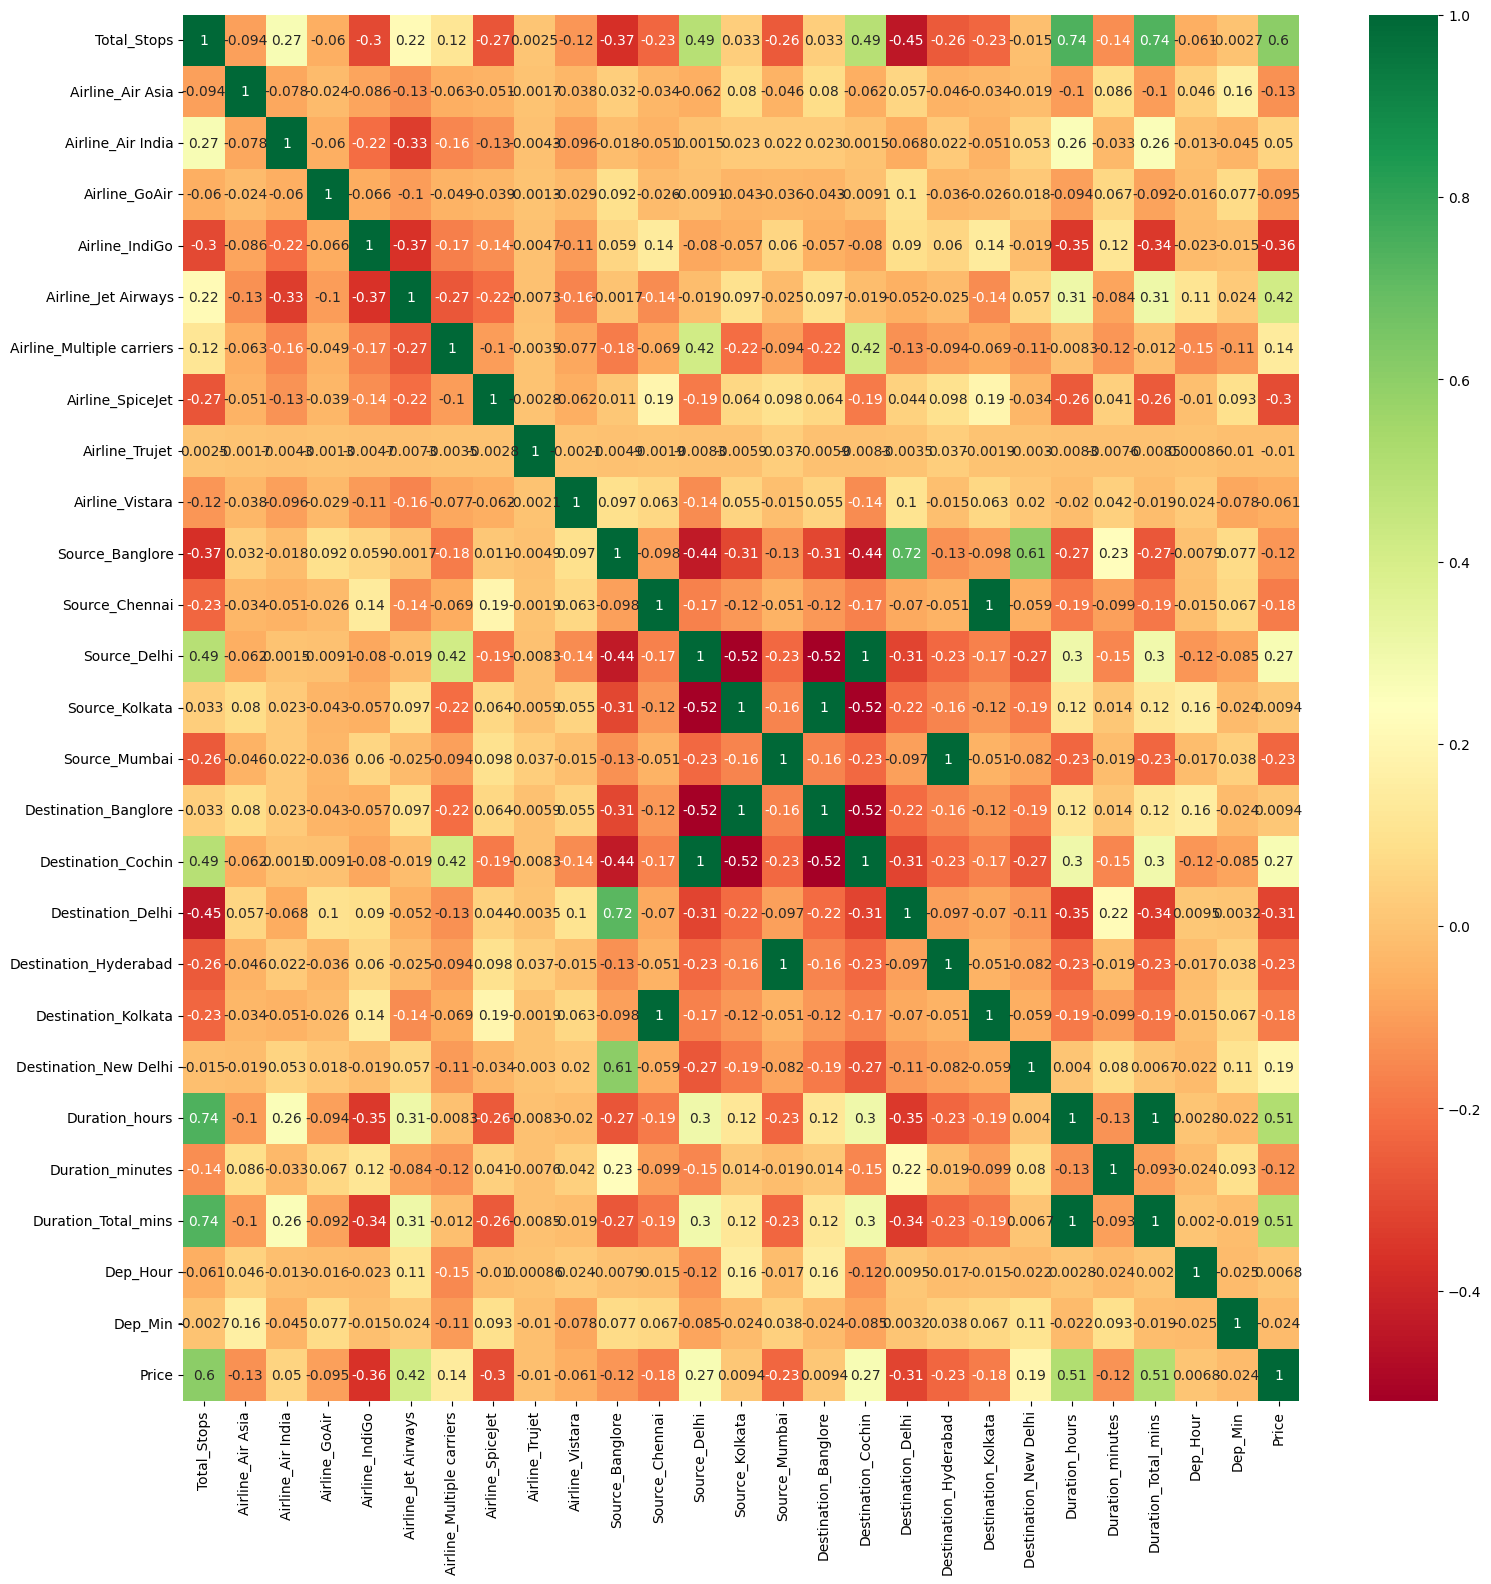

In [41]:
# Exclude the 'dep_timezone' column for correlation calculation
# Create a temporary DataFrame without the 'dep_timezone' column
new_data_numeric = new_data.drop('dep_timezone', axis=1)
# This line creates a new DataFrame called `new_data_numeric` by dropping
# the 'dep_timezone' column from the `new_data` DataFrame.
# `drop()` is a Pandas function used to remove specified labels from rows or
# columns.
# `'dep_timezone'`: This is the name of the column to be removed.
# `axis=1`: This argument specifies that the operation should be performed on
# columns (if `axis=0`, it would operate on rows).
# This step is necessary because 'dep_timezone' is a categorical column
# (likely created using `pd.cut` and labels), and direct correlation
# calculation (like Pearson correlation) is primarily meaningful for
# numerical data.

plt.figure(figsize=(18,18))
# This line creates a new figure for plotting using Matplotlib.
# `figsize=(18,18)` sets the dimensions of the figure to 18 inches by 18 inches,
# making it large enough to display a detailed heatmap.

# Calculate correlation on the numeric-only DataFrame
sns.heatmap(new_data_numeric.corr(),annot=True,cmap='RdYlGn')
# This line generates a heatmap of the correlation matrix for the
# `new_data_numeric` DataFrame using Seaborn.
# `new_data_numeric.corr()`: Calculates the pairwise correlation between
# all columns in `new_data_numeric`. The result is a correlation matrix,
# where each cell (i, j) represents the correlation between column i and column j.
# `sns.heatmap()`: A Seaborn function for plotting rectangular data as a
# color-encoded matrix.
# `annot=True`: This argument displays the correlation values (annotations)
# on the heatmap cells, making it easy to read the exact correlation coefficients.
# `cmap='RdYlGn'`: Sets the colormap for the heatmap. 'RdYlGn' stands for
# Red-Yellow-Green, where typically red indicates negative correlation,
# yellow indicates near-zero correlation, and green indicates positive correlation.

plt.show()
# This line displays the generated Matplotlib figure (the heatmap).
# Without `plt.show()`, the plot might not be rendered or might only appear
# as an object representation in some environments.

From the heatmap above, extreme green means highly positively correlated features (relationship between two variables in which both variables move in the same direction), extreme red means negatively correlated features (relationship between two variables in which an increase in one variable is associated with a decrease in the other).


Now, we can use the `corr()` function to calculate and list the correlation between all independent variables and the 'price'.


In [44]:
# Calculate correlation on the numeric-only DataFrame
features = new_data_numeric.corr()['Price'].sort_values()
# This line calculates the correlation of all numerical features with the
# 'Price' column in the `new_data_numeric` DataFrame and then sorts them.
# `new_data_numeric.corr()`: First, it computes the full pairwise correlation
# matrix for all columns in `new_data_numeric`.
# `['Price']`: From this correlation matrix, it selects only the column
# corresponding to 'Price'. This effectively gives a Series where the index
# are the feature names and the values are their correlation coefficients
# with 'Price'.
# `.sort_values()`: This method sorts the Series in ascending order by default
# based on the correlation values. This makes it easy to see which features
# have the strongest positive and negative correlations with 'Price'.

features
# This line simply displays the `features` Series, which contains the
# correlation coefficients of each numerical feature with 'Price', sorted
# from the lowest (most negative correlation) to the highest (most positive
# correlation).

,Price
Airline_IndiGo,-0.361048
Destination_Delhi,-0.313401
Airline_SpiceJet,-0.296552
Source_Mumbai,-0.230745
Destination_Hyderabad,-0.230745
Destination_Kolkata,-0.179216
Source_Chennai,-0.179216
Airline_Air Asia,-0.133044
Duration_minutes,-0.124874
Source_Banglore,-0.118026


We can also plot these correlation coefficients for easier visualization.


<Axes: >

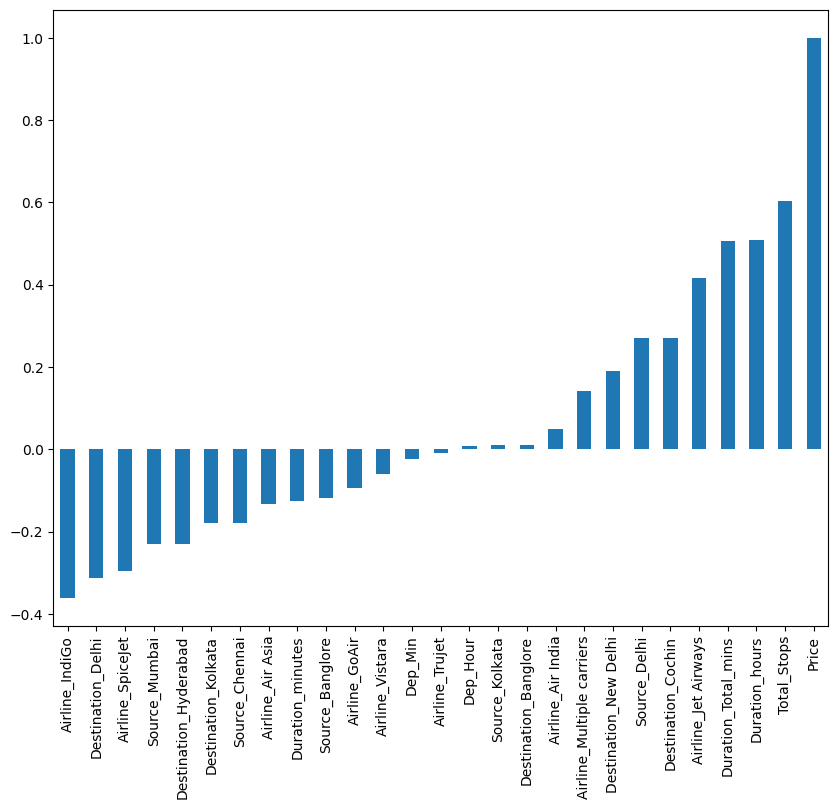

In [45]:
features.plot(kind='bar',figsize=(10,8))
# This line generates a bar plot from the `features` Series.
# `features`: This is a Pandas Series where the index represents the names
# of the features (columns) and the values represent their correlation
# coefficients with 'Price' (as calculated in the previous step).
# `.plot()`: This is a convenient method available on Pandas Series and
# DataFrames for quick plotting.
# `kind='bar'`: Specifies that the type of plot should be a bar chart. Each
# bar will represent a feature, and its height will correspond to its
# correlation value with 'Price'.
# `figsize=(10,8)`: Sets the dimensions of the plot. The plot will be 10 inches
# wide and 8 inches tall. This makes the plot readable, especially if there
# are many features.
# The bar plot visually represents the strength and direction (positive or
# negative) of the linear relationship between each feature and the 'Price'
# target variable, making it easier to identify important features.

From the graph above, we can deduct some of the highly correlated features and select only those ones for any future analysis.


## **Feature Extraction using Principal Component Analysis (Optional)**


### **PCA with Scikit-Learn**


Dimentionality reduction is part of the feature extraction process that combines the existing features to produce more useful ones. The goal of dimensionality reduction is to simplify the data without loosing too much information. Principal Component Analysis (PCA) is one of the most popular dimensionality reduction algorithms. First, it identifies the hyperplane that lies closest to the data, and then it projects the data onto it. In this way, a few multidimensional features are merged into one.

In the following portion of the lab, we will use `scikit-learn` library to perform some PCA on our data.
To learn more about `scikit-learn` PCA, please visit this [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01#sklearn.decomposition.PCA).


First, we must scale our data using the `StandardScaler()` function.
We will assign all the independent variables to x, and the dependent variable, 'price', to y.


In [46]:
x = data1.loc[:,['Total_Stops', 'Airline_Air Asia',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Multiple carriers', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Source_Banglore',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Banglore', 'Destination_Cochin', 'Destination_Delhi',
       'Destination_Hyderabad', 'Destination_Kolkata', 'Destination_New Delhi',
       'Duration_hours', 'Duration_minutes', 'Duration_Total_mins', 'Dep_Hour',
       'Dep_Min']]

In [47]:
y= data1.Price

In [48]:
scaler = StandardScaler()
x=scaler.fit_transform(x.astype(np.float64))
x

array([[-1.22052384, -0.17544122, -0.44291155, ..., -0.93158255,
         1.65425948, -0.23505036],
       [ 1.74150619, -0.17544122,  2.25778713, ..., -0.39007152,
        -1.30309491,  1.36349161],
       [ 1.74150619, -0.17544122, -0.44291155, ...,  0.97847452,
        -0.60724682,  0.0313733 ],
       ...,
       [-1.22052384, -0.17544122, -0.44291155, ..., -0.91189124,
        -0.78120884, -0.23505036],
       [-1.22052384, -0.17544122, -0.44291155, ..., -0.95127386,
        -0.25932278,  0.29779696],
       [ 1.74150619, -0.17544122,  2.25778713, ..., -0.28176932,
        -0.4332848 ,  1.62991527]])

Once the data is scaled, we can apply the `fit_transform()` function to reduce the dimensionality of the dataset down to two dimensions.


In [49]:
pca = PCA(n_components = 2)
pca.fit_transform(x)

array([[-2.87624316, -0.55623846],
       [ 0.3186912 ,  2.391719  ],
       [ 3.05949553, -0.52675338],
       ...,
       [-2.24751049, -0.58803833],
       [-2.6965784 , -0.28548066],
       [ 1.9250868 , -1.10490621]])

### **Explained Variance Ratio**


Another useful piece of information in PCA is the explained variance ratio of each principal component, available via the `explained_variance_ratio_` function. The ratio indicates the proportion of the dataset's variance that lies along each principal component. Let's look at the explained variance ratio of each of our two components.


In [50]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.17544448, 0.12112303])

The first component constitutes 17.54% of the variance and second component constitutes 12.11% of the variance between the features.


## Exercise 6 (Optional)

In this exercise, experiment with the number of components to see how many dimensions our dataset could be reduced to in order to explain most of the variability between the features. Additionally, you can plot the components using bar plot to see how much variability each component represents.


In [52]:
# Enter your code and run the cell
pca = PCA(n_components = 7)
# This line initializes a Principal Component Analysis (PCA) object from the
# `sklearn.decomposition` module.
# `n_components = 7`: This argument specifies that PCA should reduce the
# dimensionality of the data to 7 principal components. These 7 components
# will be linear combinations of the original features and will capture
# most of the variance in the data.

pca.fit_transform(x)
# This line performs two operations:
# 1. `pca.fit(x)`: It fits the PCA model to the input data `x`. During this
#    fitting process, PCA calculates the principal components (eigenvectors)
#    and their corresponding explained variances (eigenvalues) from the
#    covariance matrix of `x`. It learns the transformations needed.
# 2. `.transform(x)`: After fitting, it transforms the original data `x` into
#    the new 7-dimensional principal component space. The result of this
#    operation is the dimension-reduced data, which is not stored in this
#    line, but rather the next lines extract information from the fitted PCA
#    model.

explained_variance=pca.explained_variance_ratio_
# This line retrieves the explained variance ratio for each of the 7 principal
# components.
# `pca.explained_variance_ratio_`: This attribute of the fitted PCA object
# is a NumPy array that contains the percentage of variance explained by each
# of the selected components. The sum of these ratios equals the total
# variance explained by all 7 components.

explained_variance
# This line simply displays the `explained_variance` array. This array shows
# how much of the total variance in the original dataset is captured by each
# of the 7 principal components, in descending order. This helps in
# understanding the information retained by each component.

array([0.17544448, 0.12112303, 0.09263165, 0.0827904 , 0.0673751 ,
       0.05274873, 0.04818103])

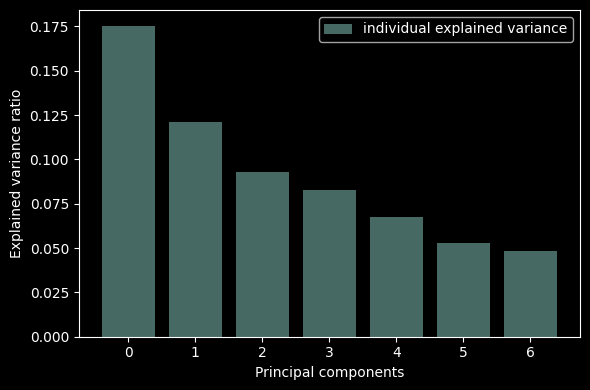

In [54]:
# Enter your code and run the cell

with plt.style.context('dark_background'):
# This line sets the plotting style context to 'dark_background'. This means
# all plots created within this 'with' block will use a dark background,
# along with corresponding color adjustments for text and lines, for
# improved visibility in dark environments.

    plt.figure(figsize=(6, 4))
    # This line creates a new figure for the plot with a specified size.
    # `figsize=(6, 4)` sets the width of the figure to 6 inches and the
    # height to 4 inches.

    plt.bar(range(7), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    # This line generates a bar plot.
    # `range(7)`: Sets the x-axis values, creating 7 bars (from 0 to 6). These
    # likely represent 7 principal components.
    # `explained_variance`: This is the data for the height of each bar. It
    # should be a list or array containing the explained variance ratio for
    # each principal component.
    # `alpha=0.5`: Sets the transparency of the bars to 50%, making them
    # semi-transparent.
    # `align='center'`: Aligns the bars to the center of their x-axis ticks.
    # `label='individual explained variance'`: Provides a label for this series
    # of bars, which will be used in the plot's legend.

    plt.ylabel('Explained variance ratio')
    # This line sets the label for the y-axis of the plot to 'Explained
    # variance ratio'. This axis represents how much variance each principal
    # component captures.

    plt.xlabel('Principal components')
    # This line sets the label for the x-axis of the plot to 'Principal
    # components'. This axis represents the different principal components.

    plt.legend(loc='best')
    # This line displays the legend on the plot.
    # `loc='best'` automatically places the legend in a location that
    # interferes least with the data points.

    plt.tight_layout()
    # This function automatically adjusts plot parameters for a tight layout.
    # It helps prevent labels from overlapping and ensures all elements of
    # the plot are visible within the figure area.

<details>
<summary><strong>Solution_part1</strong> (Click Here)</summary>
    &emsp; &emsp; <code>

pca = PCA(n_components = 7)
pca.fit_transform(x)
explained_variance=pca.explained_variance_ratio\_
explained_variance

</code>
</details>


<details>
<summary><strong>Solution_part2</strong> (Click Here)</summary>
    &emsp; &emsp; <code>

with plt.style.context('dark_background'):
    
    plt.figure(figsize=(6, 4))
    
    plt.bar(range(7), explained_variance, alpha=0.5, align='center',
    label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()


</code>
</details>


### **Choosing the Right Number of Dimensions**

Instead of arbitrary choosing the number of dimensions to reduce down to, it is simpler to choose the number of dimensions that add up to a sufficiently large proportion of the variance, let's say 95%.

The following code performs PCA without reducing dimensionality, then computes the minimum number of dimensions required to preserve 95% of the variance.


In [57]:
pca = PCA()
# This line initializes a Principal Component Analysis (PCA) object from
# scikit-learn.
# By default, without specifying `n_components`, this PCA object will compute
# all principal components, which is equal to the minimum of the number of
# samples and the number of features in the input data.

pca.fit(x)
# This line fits the PCA model to the input data `x`.
# During the fitting process, PCA calculates the principal components, which
# are new orthogonal dimensions that capture the maximum variance in the data.
# It also computes the explained variance ratio for each component.
# `x` is typically a NumPy array or a Pandas DataFrame containing the
# numerical features (independent variables) of your dataset.

cumsum = np.cumsum(pca.explained_variance_ratio_)
# This line calculates the cumulative sum of the explained variance ratios.
# `pca.explained_variance_ratio_`: This attribute of the fitted PCA object
# returns an array containing the proportion of variance explained by each
# individual principal component. The components are ordered by the amount
# of variance they explain.
# `np.cumsum()`: This NumPy function calculates the cumulative sum along a
# given axis. In this case, it sums the explained variance ratios sequentially.
# For example, if the first component explains 0.6 and the second explains 0.2,
# `cumsum` will be [0.6, 0.8, ...].

d = np.argmax(cumsum >=0.95) + 1
# This line determines the number of principal components needed to explain
# at least 95% of the total variance in the data.
# `cumsum >= 0.95`: This creates a boolean array where `True` indicates
# that the cumulative explained variance ratio at that point is greater than
# or equal to 0.95.
# `np.argmax()`: This NumPy function returns the index of the first
# occurrence of the maximum value (which is `True` in this boolean array).
# Since `np.argmax` returns a 0-based index, `+ 1` is added to get the
# actual count of principal components.
# The variable `d` will then store the minimum number of principal components
# required to capture 95% of the data's variance. This is a common technique
# for dimensionality reduction.

In [56]:
d

np.int64(16)

There are 16 components required to meet 95% variance. Therefore, we could set n_components = 16 and run PCA again. However, there is better way, instead of specifying the number of principal components you want to preserve, you can set n_components to be a float between 0.0 and 1.0, indicating the ratio of variance you wish to preserve.


In [59]:
pca = PCA(n_components=0.95)
# This line initializes a Principal Component Analysis (PCA) object.
# `n_components=0.95`: This is a crucial parameter. When a float between 0 and 1
# is passed, PCA will automatically select the minimum number of principal
# components such that the cumulative explained variance ratio is greater than
# or equal to this specified value (in this case, 95%). This effectively
# automates the process of finding `d` from the previous code snippet.

x_reduced = pca.fit_transform(x)
# This line performs two operations in one go:
# `pca.fit(x)`: First, it fits the PCA model to the input data `x`. This means
# PCA learns the principal components and their explained variances from the
# original, high-dimensional dataset `x`.
# `transform(x)`: After fitting, it transforms the original data `x` into the
# new, lower-dimensional space defined by the selected principal components.
# The output `x_reduced` will be a NumPy array (or similar structure)
# containing the data projected onto these principal components. The number
# of columns in `x_reduced` will be the number of components selected by PCA
# to explain 95% of the variance. This is a common step for dimensionality
# reduction before training machine learning models.

There is also a graphical way to determine the number of principal components in your analysis. It is to plot the explained variance as a function of the number of dimensions. There will usually be an elbow in the curve, where the explained variance stops growing fast. That point is usually the optimal point for the number of principal components.


In [60]:
px.area(
    x=range(1, cumsum.shape[0] + 1),
    # This specifies the data for the x-axis of the area plot.
    # `cumsum.shape[0]` gives the number of elements in the `cumsum` array,
    # which corresponds to the total number of principal components.
    # `range(1, cumsum.shape[0] + 1)` generates a sequence of numbers from 1
    # up to the total number of components, representing the component index.
    y=cumsum,
    # This specifies the data for the y-axis of the area plot.
    # `cumsum` is likely a NumPy array or Pandas Series containing the
    # cumulative explained variance ratio for each principal component,
    # as calculated in the previous steps of a PCA analysis.
    labels={"x": "# Components", "y": "Explained Variance"}
    # This dictionary provides custom labels for the x and y axes of the plot.
    # 'x' is labeled as "# Components", indicating the number of principal
    # components.
    # 'y' is labeled as "Explained Variance", indicating the cumulative
    # variance explained by the components.
)
# This entire block generates an interactive area plot using Plotly Express (`px`).
# The plot visualizes how the cumulative explained variance increases as more
# principal components are included. It helps in deciding the optimal number
# of components to retain for dimensionality reduction, typically by looking
# for an "elbow" point where the curve starts to flatten out or by finding
# the number of components that explain a desired percentage of variance (e.g., 95%).

# Congratulations! - You have completed the lab


## Author


[Svitlana Kramar](https://www.linkedin.com/in/svitlana-kramar/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01)


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By | Change Description      |
| ----------------- | ------- | ---------- | ----------------------- |
| 2022-01-17        | 0.1     | Svitlana   | Modified multiple areas |


Copyright © 2020 IBM Corporation. All rights reserved.
